In [3]:
!pip3 install torch

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import glob
import numpy as np
import pandas as pd

In [2]:
col_dtype={"Chr":str, "Start":int, "End":int, "ATAC Seq":bool}
col_names = ["Chr", "Start", "End", "ATAC Seq"]

In [3]:
root_path = "/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/"

In [4]:
inputs = ["ATAC-seq/", "/HiC_AB/", "/Histones_ChIP-seq/", "/RNAPolymerase_ChIP-seq/"]



In [6]:
atac_seq =["ENCFF117MSK.bed.ed.bin.binary", "ENCFF771HDN.bed.ed.bin.binary", "ENCFF976CEI.bed.ed.bin.binary", "ENCFF433EPT.bed.ed.bin.binary", "ENCFF925CYR.bed.ed.bin.binary", "ENCFF993BAP.bed.ed.bin.binary"]

In [7]:
hic = ["ENCFF369SUV.bed.ed.bin.binary", "ENCFF456BBV.bed.ed.bin.binary", "ENCFF726JJU.bed.ed.bin.binary", "ENCFF749YOA.bed.ed.bin.binary"]

In [8]:
col_dtype={"Chr":str, "Start":int, "End":int, "ATAC Seq":bool}
col_names = ["Chr", "Start", "End", "ATAC Seq"]

atac_data = [pd.read_csv(root_path + inputs[0] + "peaks/" + p, sep='\t',  names = col_names, dtype = col_dtype) for p in atac_seq]


,Chr,Start,End,ATAC Seq
0,chr1,0,200,False
1,chr1,200,400,False
2,chr1,400,600,False
3,chr1,600,800,False
4,chr1,800,1000,False
...,...,...,...,...
14405173,chr22,51303600,51303800,False
14405174,chr22,51303800,51304000,False
14405175,chr22,51304000,51304200,False
14405176,chr22,51304200,51304400,False


In [9]:
rna_seq = ["ENCFF298CPB.bed.ed.bin.binary", "ENCFF491MQT.bed.ed.bin.binary", "ENCFF686JBE.bed.ed.bin.binary", "ENCFF368TKC.bed.ed.bin.binary", "ENCFF585CYP.bed.ed.bin.binary", "ENCFF817HPW.bed.ed.bin.binary", "ENCFF467MKP.bed.ed.bin.binary", "ENCFF617PFZ.bed.ed.bin.binary", "ENCFF842JME.bed.ed.bin.binary"]

In [10]:

col_dtype={"Chr":str, "Start":int, "End":int, "RNA Seq":bool}
col_names = ["Chr", "Start", "End", "RNA Seq"]

rna_data = [pd.read_csv(root_path + inputs[3] + "peaks/" + p, sep='\t', names = col_names ,dtype = col_dtype) for p in rna_seq]

In [11]:
rna_data[0]["RNA Seq"].value_counts()

False    14348048
True        57130
Name: RNA Seq, dtype: int64

In [12]:
col_dtype={"Chr":str, "Start":int, "End":int, "HiC":bool}
col_names = ["Chr", "Start", "End", "HiC"]

HiC_paths = glob.glob(os.path.join(root_path, "HiC_AB" + "/",'*binary'))
print("Scanning paths", HiC_paths)
HiC_data = [pd.read_csv(p, sep='\t', names = col_names ,dtype = col_dtype) for p in HiC_paths]

Scanning paths ['/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF726JJU.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF456BBV.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF369SUV.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/HiC_AB/ENCFF749YOA.bed.ed.bin.binary']


In [13]:
histone_path = "/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks"
histones = os.listdir(histone_path)

histone_data = []
for i in histones:
    if i == 'README' or i=="tmp":
        continue
    
    col_dtype={"Chr":str, "Start":int, "End":int, i:int}
    col_names = ["Chr", "Start", "End", i]

    histone_paths = glob.glob(os.path.join(histone_path,i,'*binary'))
    print("Scanning paths", histone_paths)
    for i,p in enumerate(histone_paths):
        if i != 0:
            continue
        histone_data.append(pd.read_csv(p, sep='\t', names = col_names ,dtype = col_dtype))

Scanning paths ['/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks/H3K9Ac/ENCFF184IVL.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks/H3K9Ac/ENCFF171GKK.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks/H3K9Ac/ENCFF890RCT.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks/H3K9Ac/ENCFF731INI.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks/H3K9Ac/ENCFF418BIN.bed.ed.bin.binary']
Scanning paths ['/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks/H3K4me3/ENCFF084PQN.bed.ed.bin.binary', '/gpfs/commons/home/cangel/g2lab/courses/ComputationalGenomics/project/data/Histones_ChIP-seq/peaks/H3K4me3/ENCFF282LNM.bed.ed.bin.bi

In [14]:
print(len(histone_data))
print(len(atac_seq))
print(len(rna_data))
print(len(HiC_data))



6
6
9
4


In [15]:
#Only consider first cell line
atac_data = atac_data[0]
rna_data = rna_data[0]
HiC_data = HiC_data[0]

In [22]:
atac_data = atac_data[0]

[            Chr     Start       End  H3K9Ac
 0          chr1         0       200       0
 1          chr1       200       400       0
 2          chr1       400       600       0
 3          chr1       600       800       0
 4          chr1       800      1000       0
 ...         ...       ...       ...     ...
 14405173  chr22  51303600  51303800       0
 14405174  chr22  51303800  51304000       0
 14405175  chr22  51304000  51304200       0
 14405176  chr22  51304200  51304400       0
 14405177  chr22  51304400  51304566       0
 
 [14405178 rows x 4 columns],             Chr     Start       End  H3K4me3
 0          chr1         0       200        0
 1          chr1       200       400        0
 2          chr1       400       600        0
 3          chr1       600       800        0
 4          chr1       800      1000        0
 ...         ...       ...       ...      ...
 14405173  chr22  51303600  51303800        0
 14405174  chr22  51303800  51304000        0
 14405175  chr2

In [23]:
histone_data = pd.concat(histone_data, axis = 1)

,Chr,Start,End,H3K9Ac,Chr,Start,End,H3K4me3,Chr,Start,...,End,H3K27me3,Chr,Start,End,H3K4me1,Chr,Start,End,H3K27Ac
0,chr1,0,200,0,chr1,0,200,0,chr1,0,...,200,0,chr1,0,200,0,chr1,0,200,0
1,chr1,200,400,0,chr1,200,400,0,chr1,200,...,400,0,chr1,200,400,0,chr1,200,400,0
2,chr1,400,600,0,chr1,400,600,0,chr1,400,...,600,0,chr1,400,600,0,chr1,400,600,0
3,chr1,600,800,0,chr1,600,800,0,chr1,600,...,800,0,chr1,600,800,0,chr1,600,800,0
4,chr1,800,1000,0,chr1,800,1000,0,chr1,800,...,1000,0,chr1,800,1000,0,chr1,800,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14405173,chr22,51303600,51303800,0,chr22,51303600,51303800,0,chr22,51303600,...,51303800,0,chr22,51303600,51303800,0,chr22,51303600,51303800,0
14405174,chr22,51303800,51304000,0,chr22,51303800,51304000,0,chr22,51303800,...,51304000,0,chr22,51303800,51304000,0,chr22,51303800,51304000,0
14405175,chr22,51304000,51304200,0,chr22,51304000,51304200,0,chr22,51304000,...,51304200,0,chr22,51304000,51304200,0,chr22,51304000,51304200,0
14405176,chr22,51304200,51304400,0,chr22,51304200,51304400,0,chr22,51304200,...,51304400,0,chr22,51304200,51304400,0,chr22,51304200,51304400,0


In [25]:
full_data = pd.concat([histone_data, atac_data, HiC_data, rna_data], axis=1)

In [26]:
full_data_trimmed = full_data.loc[:,~full_data.columns.duplicated()].copy()


In [27]:
full_data_trimmed

,Chr,Start,End,H3K9Ac,H3K4me3,H3K4me2,H3K27me3,H3K4me1,H3K27Ac,ATAC Seq,HiC,RNA Seq
0,chr1,0,200,0,0,0,0,0,0,False,False,False
1,chr1,200,400,0,0,0,0,0,0,False,False,False
2,chr1,400,600,0,0,0,0,0,0,False,False,False
3,chr1,600,800,0,0,0,0,0,0,False,False,False
4,chr1,800,1000,0,0,0,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14405173,chr22,51303600,51303800,0,0,0,0,0,0,False,False,False
14405174,chr22,51303800,51304000,0,0,0,0,0,0,False,False,False
14405175,chr22,51304000,51304200,0,0,0,0,0,0,False,False,False
14405176,chr22,51304200,51304400,0,0,0,0,0,0,False,False,False


In [28]:
normalized_data = full_data_trimmed.copy()
normalized_data["Start"] = normalized_data["Start"].div(200)
normalized_data["End"] = normalized_data["End"].div(200)



In [29]:
normalized_data.info(verbose = 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14405178 entries, 0 to 14405177
Data columns (total 12 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Chr       object 
 1   Start     float64
 2   End       float64
 3   H3K9Ac    int64  
 4   H3K4me3   int64  
 5   H3K4me2   int64  
 6   H3K27me3  int64  
 7   H3K4me1   int64  
 8   H3K27Ac   int64  
 9   ATAC Seq  bool   
 10  HiC       bool   
 11  RNA Seq   bool   
dtypes: bool(3), float64(2), int64(6), object(1)
memory usage: 1.0+ GB


In [31]:
normalized_data.to_csv("./normalized_data.csv")

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [102]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    normalized_data[['Start', 'End', 'H3K9Ac', 'H3K4me3', 'H3K4me2', 'H3K27me3', 'H3K4me1', 'H3K27Ac', 'ATAC Seq', 'HiC']],
    normalized_data['RNA Seq'], test_size=0.2)

# Train a MLP regressor with two hidden layers of 10 neurons each
mlp = MLPRegressor(hidden_layer_sizes=(10, 10))
mlp.fit(X_train, y_train)

# Predict the target values on the test set and calculate the mean squared error
y_pred = mlp.predict(X_test)


Mean squared error: 0.00


In [103]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean squared error: {mse:}")

Mean squared error: 0.004014526198534288


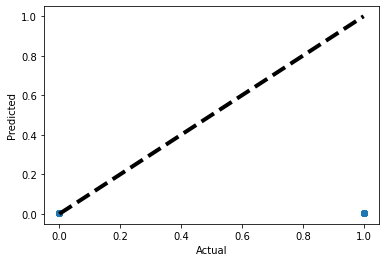

In [105]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [110]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

class_weights = {0: 1, 1: len(y_train[y_train==0])/len(y_train[y_train==1])}

# Train a MLP classifier with two hidden layers of 10 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), class_weight=class_weights)
mlp.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

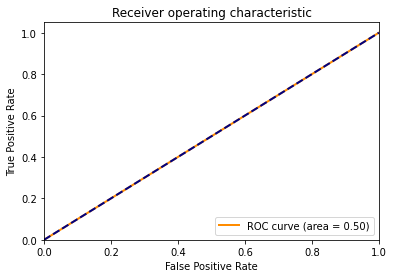

In [109]:
# Predict the probabilities of the positive class on the test set
y_pred_prob = mlp.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [60]:
obs = [pd.read_table(glob.glob(os.path.join(root_path,i + "/peaks/",'*binary'))[0],header = None, 
                     names= ['chr','start','end',i]) for i in assays if i!= 'README' or i!='resources' or i != 'Histones_ChIP-seq']

IndexError: list index out of range

In [57]:
obs = [pd.read_table(glob.glob(os.path.join(root_path,i + "/peaks/",'*binary'))[0],header = None, 
                     names= ['chr','start','end',i]) for i in assays if i!= 'README' or i!='resources']

NameError: name 'obs' is not defined

['RNAPolymerase_ChIP-seq', 'Histones_ChIP-seq', 'HiC_AB', 'resources', 'ATAC-seq']


In [111]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split

In [112]:
# Define the MLP class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [141]:
# Compute the weights for the two classes based on their frequencies in the training set

class_weights = torch.tensor([1, 10 * len(y_train[y_train==0])/len(y_train[y_train==1])], dtype=torch.float)
print(class_weights)

tensor([1.0000e+00, 2.5218e+03])


In [128]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

y_train = y_train.astype('bool')
y_test = y_test.astype('bool')

In [133]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [134]:
# Define the DataLoader objects to batch and shuffle the data during training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [142]:
# Instantiate the MLP model, criterion and optimizer
model = MLP(input_size=10, hidden_size=10, output_size=2)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters())

STOP = 31250
# Train the model
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print('Epoch %d, loss: %.3f' % (epoch+1, running_loss/len(train_loader)))

Epoch 1, loss: 13.300


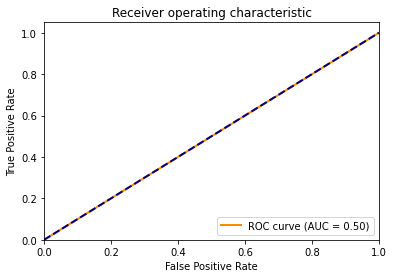

In [143]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a function to plot the ROC curve
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the model on the test set and generate predictions
y_true = y_test_tensor.numpy()
y_scores = model(X_test_tensor).detach().numpy()[:, 1]

# Plot the ROC curve
plot_roc_curve(y_true, y_scores)

In [140]:











    
# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy on test set: %f' % (100 * correct / total))

Accuracy on test set: 99.596951


In [33]:

X_train_r, X_test_r, y_train_r, y_tes_rt = train_test_split(
    normalized_data[['Start', 'End', 'H3K9Ac', 'H3K4me3', 'H3K4me2', 'H3K27me3', 'H3K4me1', 'H3K27Ac', 'ATAC Seq', 'HiC']],
    normalized_data['RNA Seq'], test_size=0.2)

train_df = pd.concat([X_train_r, y_train_r], axis=1)
true_rows = train_df[train_df['RNA Seq'] == True]
false_rows = train_df[train_df['RNA Seq'] == False]

# Shuffle the data to avoid any possible bias
true_rows = true_rows.sample(frac=1).reset_index(drop=True)
false_rows = false_rows.sample(frac=1).reset_index(drop=True)

# Determine the number of rows to include for each output
num_true_rows = min(len(false_rows), len(true_rows))
num_false_rows = min(len(false_rows), len(true_rows))

# Slice the first 'num_true_rows' true rows and the first 'num_false_rows' false rows
reduced_df = pd.concat([true_rows[:num_true_rows], false_rows[:num_false_rows]])

# Shuffle the reduced dataset again
reduced_df = reduced_df.sample(frac=1).reset_index(drop=True)

# Split the reduced dataset back into X_train and y_train
X_train_r = reduced_df.drop('RNA Seq', axis=1)
y_train_r = reduced_df['RNA Seq']

In [41]:
# Train a MLP regressor with two hidden layers of 10 neurons each
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


# Train a MLP classifier with two hidden layers of 10 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(10, 10))
mlp.fit(X_train_r, y_train_r)

# Predict the target values on the test set and calculate the mean squared error
y_pred = mlp.predict(X_test_r)

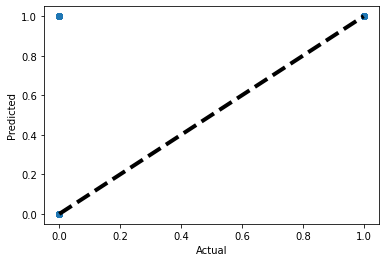

In [42]:
import matplotlib.pyplot as plt


plt.scatter(y_tes_rt, y_pred)
plt.plot([y_tes_rt.min(), y_tes_rt.max()], [y_tes_rt.min(), y_tes_rt.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

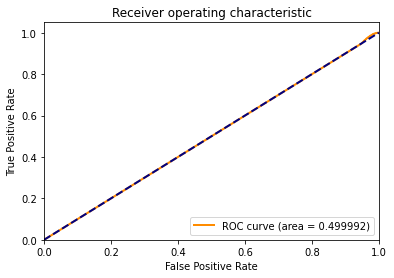

In [44]:
# Predict the probabilities of the positive class on the test set
y_pred_prob = mlp.predict_proba(X_test_r)[:, 1]

# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_tes_rt, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()